In [24]:
import random as rnd

# 4.1

### Analytical Answer

We are looking for $P(X \text{ divisible by } 3 \mid X \geq 5  and \leq 9)$, where $X$ is a uniformly drawn integer between 1 and 9.

The integers greater than or equal to 5 are: $\{5, 6, 7, 8, 9\}$. Among these, the numbers divisible by 3 are: $\{6, 9\}$.

Thus, the probability is:

$$
P(X \text{ divisible by } 3 \mid X \geq 5) = \frac{\text{Number of favorable outcomes}}{\text{Total outcomes}} = \frac{2}{5}
$$

So, the analytical answer is $\frac{2}{5} = 0.4$.


In [25]:
# this is the compuataional answer

# Function to check if a number is divisible by 3
def is_divisible_by_3(x):
    return x % 3 == 0

# Simulation function
def simulate_prob_divisible_by_3_given_ge_5(num_samples):
    favorable = 0
    total = 0
    for _ in range(num_samples):
        x = rnd.randint(5, 9)  # Draw an integer between 5 and 9
        total += 1
        if is_divisible_by_3(x):
            favorable += 1
    return favorable / total

# Test with increasing sample sizes
for num_samples in [100, 1000, 10000, 100000]:
    estimated_prob = simulate_prob_divisible_by_3_given_ge_5(num_samples)
    print(f"Sample size: {num_samples}, Estimated Probability: {estimated_prob:.4f}")


Sample size: 100, Estimated Probability: 0.4200
Sample size: 1000, Estimated Probability: 0.3870
Sample size: 10000, Estimated Probability: 0.4040
Sample size: 100000, Estimated Probability: 0.4037


# Problem 2

#### 1. What is the probability that a 3 is chosen?

The probability of picking the odd box is $\frac{1}{2}$, and given that the odd box is chosen, the probability of selecting the ball numbered 3 is $\frac{1}{3}$. Therefore, the overall probability of choosing 3 is:

$$
P(\text{3 is chosen}) = P(\text{odd box}) \cdot P(\text{3} \mid \text{odd box}) = \frac{1}{2} \times \frac{1}{3} = \frac{1}{6}
$$

#### 2. What is the probability a number less than or equal to 2 is chosen?

The number 1 is in the odd box, and the number 2 is in the even box.

- Probability of choosing the odd box and getting 1:
  $$
  P(\text{1 is chosen}) = P(\text{odd box}) \cdot P(\text{1} \mid \text{odd box}) = \frac{1}{2} \times \frac{1}{3} = \frac{1}{6}
  $$

- Probability of choosing the even box and getting 2:
  $$
  P(\text{2 is chosen}) = P(\text{even box}) \cdot P(\text{2} \mid \text{even box}) = \frac{1}{2} \times \frac{1}{2} = \frac{1}{4}
  $$

Thus, the total probability of choosing a number less than or equal to 2 is:

$$
P(\text{number} \leq 2) = \frac{1}{6} + \frac{1}{4} = \frac{2}{12} + \frac{3}{12} = \frac{5}{12}
$$

#### 3. How does this distribution compare to picking a number uniformly from $\{1, 2, 3, 4, 5\}$?

In the given procedure, the probability distribution on the set $\{1, 2, 3, 4, 5\}$ is not uniform. The probabilities of choosing each number are:

- $P(1) = \frac{1}{6}$
- $P(2) = \frac{1}{4}$
- $P(3) = \frac{1}{6}$
- $P(4) = \frac{1}{4}$
- $P(5) = \frac{1}{6}$

In a uniform distribution over $\{1, 2, 3, 4, 5\}$, each number would have a probability of $\frac{1}{5} = 0.2$, but as shown, the probabilities in this procedure vary between $\frac{1}{6}$ and $\frac{1}{4}$. Therefore, this method does not produce a uniform distribution.


#### 1. What is the chance of winning a car if one switches when offered?

The total probability of winning by switching when offered is:

$$
P(\text{win} \mid \text{switch}) = p \cdot \frac{2}{3} + (1 - p) \cdot 0 = \frac{2p}{3}
$$

#### 2. What is the chance of winning a car if one never switches when offered?

The total probability of winning by never switching is:

$$
P(\text{win} \mid \text{no switch}) = p \cdot \frac{1}{3} + (1 - p) \cdot \frac{1}{3} = \frac{1}{3}
$$

#### 3. Is there a value of \( p \) where it no longer matters if one switches or not?

To find this value, we set the two probabilities equal:

$$
\frac{2p}{3} = \frac{1}{3}
$$

Solving for \( p \):

$$
2p = 1 \\
p = \frac{1}{2}
$$

Thus, when $p = \frac{1}{2}$, it no longer matters whether one switches or not. At this point, both strategies (always switch when offered and never switch when offered) give a 1/3 chance of winning.


p = 0.0: Switch prob = 0.0000, No switch prob = 0.3360
p = 0.1: Switch prob = 0.0662, No switch prob = 0.3326
p = 0.2: Switch prob = 0.1343, No switch prob = 0.3358
p = 0.3: Switch prob = 0.2007, No switch prob = 0.3352
p = 0.4: Switch prob = 0.2664, No switch prob = 0.3350
p = 0.5: Switch prob = 0.3340, No switch prob = 0.3337
p = 0.6: Switch prob = 0.3993, No switch prob = 0.3335
p = 0.7: Switch prob = 0.4672, No switch prob = 0.3311
p = 0.8: Switch prob = 0.5328, No switch prob = 0.3357
p = 0.9: Switch prob = 0.6013, No switch prob = 0.3303
p = 1.0: Switch prob = 0.6680, No switch prob = 0.3348


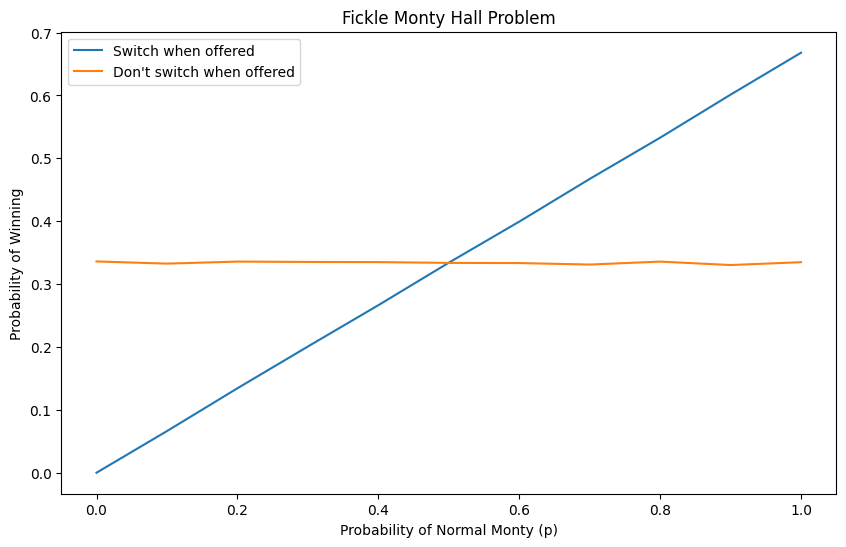

In [40]:
import matplotlib.pyplot as plt

def setup_doors(n):
    doors = ["Goat"] * n
    car_door = rnd.randint(0, n-1)
    doors[car_door] = "Car"
    return doors

def is_normal_monty(p):
    return rnd.random() < p

def run_game(n, p, switch_policy):
    doors = setup_doors(n)
    player_choice = rnd.randint(0, n-1)
    
    if is_normal_monty(p):
        # Normal Monty: Always offers to switch
        if doors[player_choice] == "Car":
            return not switch_policy  # Win if don't switch, lose if switch
        else:
            return switch_policy  # Win if switch, lose if don't switch
    else:
        # Mean Monty: Only offers to switch if player chose car
        if doors[player_choice] == "Car":
            return not switch_policy  # Win if don't switch, lose if switch
        else:
            return False  # Always lose with mean Monty if didn't choose car

def simulate_games(n, p, num_games, switch_policy):
    wins = 0
    for _ in range(num_games):
        if run_game(n, p, switch_policy):
            wins += 1
    return wins / num_games



# Simulation parameters
n = 3  # Number of doors
num_games = 100000  # Number of games per simulation
p_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

switch_probs = []
no_switch_probs = []

for p in p_values:
    switch_prob = simulate_games(n, p, num_games, True)
    no_switch_prob = simulate_games(n, p, num_games, False)
    switch_probs.append(switch_prob)
    no_switch_probs.append(no_switch_prob)
    print(f"p = {p:.1f}: Switch prob = {switch_prob:.4f}, No switch prob = {no_switch_prob:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(p_values, switch_probs, label="Switch when offered")
plt.plot(p_values, no_switch_probs, label="Don't switch when offered")
plt.xlabel("Probability of Normal Monty (p)")
plt.ylabel("Probability of Winning")
plt.title("Fickle Monty Hall Problem")
plt.legend()
plt.show()

# Theoretical probabilities
theoretical_switch = [2*p/3 for p in p_values]
theoretical_no_switch = [1/3] * len(p_values)

The probability of the other side being white, given that one side is black, is:

$$
P(A \mid B) = \frac{P(\text{black-white})}{P(\text{black-white}) + P(\text{black-black})}
$$

Hence it should be (plugging and chugging the values):

$$
P(A \mid B) = \frac{0.5}{0.5 + 0.3} = \frac{0.5}{0.8} = 0.625
$$

Thus, the exact probability is \( 0.625 \) or 62.5%.


In [27]:
# Define the probabilities for each card type
cards = {
    "white-white": 0.2,  # 20% of cards
    "black-white": 0.5,  # 50% of cards
    "black-black": 0.3   # 30% of cards
}

def draw_card():
    # Randomly select a card based on its probability
    rand = rnd.random()
    if rand < cards["white-white"]:
        return "white-white"
    elif rand < cards["white-white"] + cards["black-white"]:
        return "black-white"
    else:
        return "black-black"

def monte_carlo_simulation(num_trials):
    black_side_seen = 0
    white_other_side = 0
    
    for _ in range(num_trials):
        card = draw_card()
        
        # Only consider cases where a black side is seen
        if "black" in card:
            black_side_seen += 1
            # Check if the other side is white
            if card == "black-white":
                white_other_side += 1
    
    # Probability that the other side is white given that a black side is seen
    return white_other_side / black_side_seen

# Run the simulation
num_trials = 100000
estimated_probability = monte_carlo_simulation(num_trials)
print(f"Estimated Probability: {estimated_probability:.4f}")



Estimated Probability: 0.6245


- **0 sources working**: Neither source works, so:

$$
P(0 \text{ sources working}) = (1 - 0.4)(1 - 0.5) = 0.6 \times 0.5 = 0.3
$$

- **1 source working**: Either source 1 works and source 2 doesn't, or source 2 works and source 1 doesn't, so:

$$
P(1 \text{ source working}) = 0.4 \times (1 - 0.5) + (1 - 0.4) \times 0.5 = 0.4 \times 0.5 + 0.6 \times 0.5 = 0.2 + 0.3 = 0.5
$$

- **2 sources working**: Both sources work, so:

$$
P(2 \text{ sources working}) = 0.4 \times 0.5 = 0.2
$$

### 2. Probability that enough power will be available

- **Enough power from 0 sources**: \( P(0 \text{ sources}) = 0 \) (since no power is available when both fail).
- **Enough power from 1 source**: \( P(1 \text{ source}) = P(1 \text{ source working}) \times 0.6 = 0.5 \times 0.6 = 0.3 \).
- **Enough power from 2 sources**: \( P(2 \text{ sources}) = P(2 \text{ sources working}) \times 1 = 0.2 \times 1 = 0.2 \).

Thus, the total probability that enough power will be available is:

$$
P(\text{enough power}) = 0 + 0.3 + 0.2 = 0.5
$$

So, the probability that enough power will be available is \( 0.5 \) or 50%.


(array([50117., 50341., 50313., 50022., 49767., 49720., 49839., 50034.,
        49723., 50142., 50265., 50075., 49792., 50094., 49814., 49971.,
        50140., 49978., 50094., 49759.]),
 array([4.02540426e-07, 5.00003572e-02, 1.00000312e-01, 1.50000266e-01,
        2.00000221e-01, 2.50000176e-01, 3.00000130e-01, 3.50000085e-01,
        4.00000040e-01, 4.49999994e-01, 4.99999949e-01, 5.49999904e-01,
        5.99999858e-01, 6.49999813e-01, 6.99999768e-01, 7.49999722e-01,
        7.99999677e-01, 8.49999632e-01, 8.99999586e-01, 9.49999541e-01,
        9.99999495e-01]),
 <BarContainer object of 20 artists>)

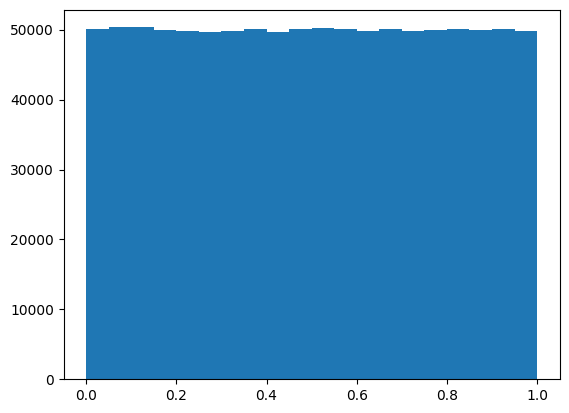

In [37]:
# create a historgram of places where rnd.random() lands

a = [rnd.random() for _ in range(1000000)]

# historgram of the random numbers

plt.hist(a, bins=20)
    